# IMPORTING REQUIRED LIBRARIES

In [1]:
import pandas as pd 
import numpy as np
import re
import sklearn
from sklearn.ensemble import GradientBoostingClassifier
import pickle

# LOADING THE DATA

In [2]:
data = pd.read_csv('C:/Users/ajaysripada/mini project/alldata.csv')

In [3]:
data.shape

(6964, 5)

In [4]:
data.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,123.0,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",634.0,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",964.0,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [5]:
data.tail()

,position,company,description,reviews,location
6959,Data Developer / Machine Learning Analyst,NetApp,Are you data-driven? We at NetApp believe in t...,574.0,"Sunnyvale, CA"
6960,Scientist I,"Pharmacyclics, an Abbvie Company",Pharmacyclics is committed to the development ...,26.0,"Sunnyvale, CA"
6961,Intern Scientist,Oath Inc,"Oath, a subsidiary of Verizon, is a values-led...",5.0,"Sunnyvale, CA"
6962,Senior Data & Applied Scientist,Microsoft,We are the Bing Core Relevance team responsibl...,4618.0,"Sunnyvale, CA"
6963,"Principal Data Scientist, Deep Learning",Comcast,Comcast’s Technology &amp; Product organizatio...,11610.0,"Sunnyvale, CA 94089"


# ANALYSING OF DATA

In [6]:
data.columns

Index(['position', 'company', 'description', 'reviews', 'location'], dtype='object')

In [7]:
data.describe()

,reviews
count,5341.000000
mean,3171.674593
std,8437.851100
min,2.000000
25%,27.000000
50%,230.000000
75%,1578.000000
max,148114.000000


In [8]:
data.nunique()

position       5242
company        2213
description    6702
reviews         567
location        382
dtype: int64

In [9]:
data['position'].unique()

array(['Development Director',
       'An Ostentatiously-Excitable Principal Research Assistant to Chief Scientist',
       'Data Scientist', ..., 'Data Developer / Machine Learning Analyst',
       'Intern Scientist', 'Principal Data Scientist, Deep Learning'],
      dtype=object)

In [10]:
data['company'].unique()

array(['ALS TDI', 'The Hexagon Lavish', 'Xpert Staffing', ..., 'Nexient',
       'Arosys', 'Whiterabbit.ai'], dtype=object)

In [11]:
location = data['location'].value_counts()
top = list(location.index)[:10]
top

['Seattle, WA',
 'New York, NY',
 'Cambridge, MA',
 'Boston, MA',
 'San Francisco, CA',
 'San Diego, CA',
 'Chicago, IL',
 'Boulder, CO',
 'Washington, DC',
 'Sunnyvale, CA']

In [12]:
reviews = data['reviews'].value_counts()
top = list(reviews.index)[:20]
top

[25902.0,
 108.0,
 2.0,
 5.0,
 4.0,
 4618.0,
 2474.0,
 3.0,
 6.0,
 25895.0,
 7.0,
 705.0,
 91.0,
 8.0,
 15.0,
 838.0,
 32.0,
 11.0,
 366.0,
 14.0]

In [13]:
positions = data['position'].value_counts()
top = list(positions.index)[:100]
top

['Data Scientist',
 'Senior Data Scientist',
 'Research Analyst',
 'Data Engineer',
 'Machine Learning Engineer',
 'Lead Data Scientist',
 'Research Scientist',
 'Sr. Data Scientist',
 'Principal Data Scientist',
 'Data Analyst',
 'Software Engineer',
 'Quantitative Analyst',
 'Scientist',
 'Product Manager',
 'Bioinformatics Scientist',
 'Market Research Analyst',
 'Senior Software Engineer',
 'Software Engineer, Machine Learning',
 'Machine Learning Scientist',
 'Senior Data Engineer',
 'Senior Research Analyst',
 'Staff Data Scientist',
 'Senior Scientist',
 'Software Development Engineer',
 'Associate Scientist',
 'Research Associate',
 'Lead Data Engineer',
 'Student Research Collaboration',
 'Senior Machine Learning Engineer',
 'Sr. Data Engineer',
 'Senior Machine Learning Scientist',
 'Clinical Scientist',
 'Senior Associate, Data Scientist',
 'Business Analyst',
 'Research Data Analyst',
 'Senior Software Development Engineer',
 'Director, Data Science',
 'Senior Quantitative 

In [14]:
print(data['position'].value_counts())

Data Scientist                                            351
Senior Data Scientist                                      96
Research Analyst                                           64
Data Engineer                                              60
Machine Learning Engineer                                  56
                                                         ... 
Senior GIS FEMA Production Task Lead                        1
Scientist - Structural Biology                              1
Property/Asset Management Analyst (early - mid career)      1
Program Associate                                           1
BI Analyst, Developer                                       1
Name: position, Length: 5242, dtype: int64


# CLEANING OF DATA

In [15]:
data.isnull().any()

position       True
company        True
description    True
reviews        True
location       True
dtype: bool

In [16]:
data.isnull().sum()

position         11
company          11
description      11
reviews        1623
location         11
dtype: int64

In [17]:
data["reviews"].fillna(data["reviews"].mode()[0],inplace = True)
data["position"].fillna(data["position"].mode()[0],inplace = True)
data["description"].fillna(data["description"].mode()[0],inplace = True)
data["location"].fillna(data["location"].mode()[0],inplace = True)
data["company"].fillna(data["company"].mode()[0],inplace = True)

In [18]:
data.isnull().any()

position       False
company        False
description    False
reviews        False
location       False
dtype: bool

# VISUALIZING THE DATA

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

<AxesSubplot:>

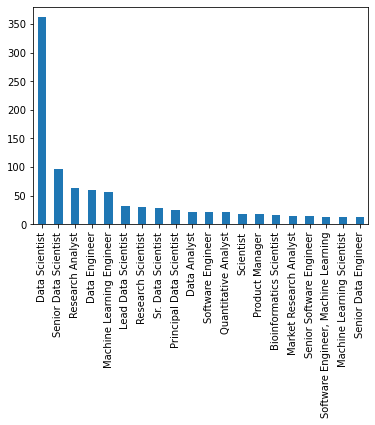

In [20]:
data['position'].value_counts().head(20).plot.bar()

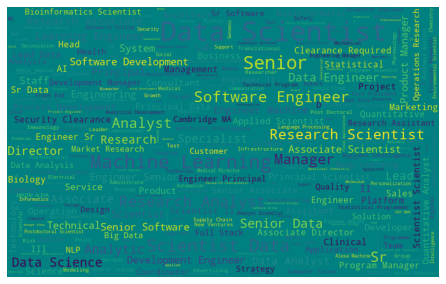

In [21]:
positions_text = " ".join(data['position'].dropna().to_list())
wordcloud = WordCloud( width = 800,height=500,max_font_size=50, max_words=300, background_color="teal").generate(positions_text)
  
# plot the WordCloud image    
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

<AxesSubplot:>

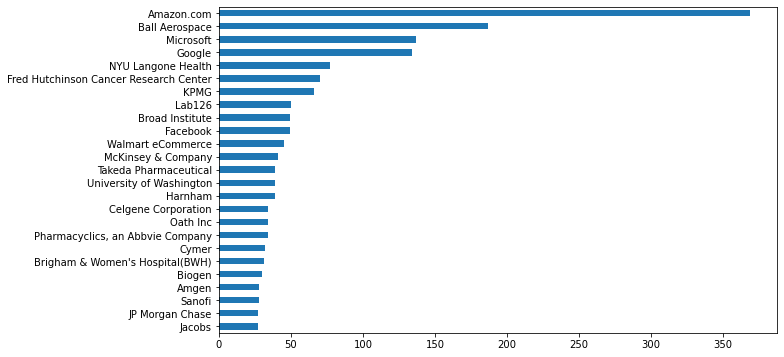

In [22]:
data['company'].value_counts().head(25).sort_values().plot.barh(figsize = (10,6))

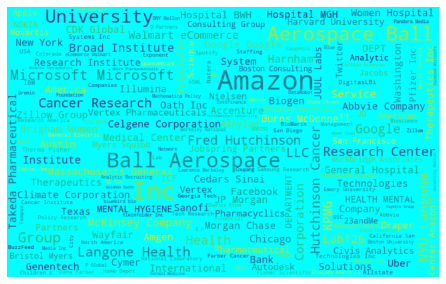

In [23]:
positions_text = " ".join(data['company'].dropna().to_list())
wordcloud = WordCloud(width = 800,height=500,max_font_size=50, max_words=200, background_color="aqua").generate(positions_text)
  
# plot the WordCloud image                        
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [24]:
import seaborn as sns

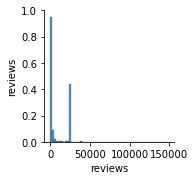

In [25]:
sns.pairplot(data)

In [26]:
description = data['position']

In [27]:
description[0]

'Development Director'

## CREATING JOB CLASSIFIER

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
#there are so many job profiles in teh given dataset so lets Categories them into 5; Data Scientist, Machine Learning Engineer, Data Analyst, Data Science Manager and Others

# Creating only 5 datascience roles among all
data2 = data.copy()
data2.dropna(subset=['position'], how='all', inplace = True)
data2['position']=[x.upper() for x in data2['position']]
data2['description']=[x.upper() for x in data2['description']]

data2.loc[data2.position.str.contains("SCIENTIST"), 'position'] = 'Data Scientist'

data2.loc[data2.position.str.contains('ENGINEER'),'position']='Machine Learning Engineer'
data2.loc[data2.position.str.contains('PRINCIPAL STATISTICAL PROGRAMMER'),'position']='Machine Learning Engineer'
data2.loc[data2.position.str.contains('PROGRAMMER'),'position']='Machine Learning Engineer'
data2.loc[data2.position.str.contains('DEVELOPER'),'position']='Machine Learning Engineer'

data2.loc[data2.position.str.contains('ANALYST'), 'position'] = 'Data Analyst'
data2.loc[data2.position.str.contains('STATISTICIAN'), 'position'] = 'Data Analyst'

data2.loc[data2.position.str.contains('MANAGER'),'position']='Data Science Manager'
data2.loc[data2.position.str.contains('CONSULTANT'),'position']='Data Science Manager'
data2.loc[data2.position.str.contains('DATA SCIENCE'),'position']='Data Science Manager'
data2.loc[data2.position.str.contains('DIRECTOR'),'position']='Data Science Manager'

data2.position=data2[(data2.position == 'Data Scientist') | (data2.position == 'Data Analyst') | (data2.position == 'Machine Learning Engineer') | (data2.position == 'Data Science Manager')]
data2.position=['Others' if x is np.nan else x for x in data2.position]

position=data2.groupby(['position'])['company'].count()   
position=position.reset_index(name='company')
position=position.sort_values(['company'],ascending=False)

print('Here is  the count of each new roles we created :', '\n\n', position)

Here is  the count of each new roles we created : 

                     position  company
2             Data Scientist     2656
3  Machine Learning Engineer     1384
4                     Others     1295
0               Data Analyst      848
1       Data Science Manager      781


In [30]:
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [32]:
# Next Part in ML Algorithm is Data Cleaning
X=data2.description
Y=data2.position
#X=data.description
#Y=data.position


X=[re.sub(r"[^a-zA-Z0-9]+", ' ', k) for k in X]
X=[re.sub("[0-9]+",' ',k) for k in X]

#applying stemmer
ps =PorterStemmer()
X=[ps.stem(k) for k in X]

#Note: I have not removed stop words because there are important key words mentioned in job description which are of length 2, I feel they have weightage while classifing
tfidf=TfidfVectorizer()
label_enc=LabelEncoder()

X=tfidf.fit_transform(X)
Y=label_enc.fit_transform(Y)



x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=Y,test_size=0.3)

In [33]:
#exporting the tfidf encoder
pickle.dump(tfidf, open("tfidf1.pkl", "wb"))


#exporting the label encoder
pickle.dump(label_enc, open('Departure_encoder.pkl', 'wb'))

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
from sklearn.svm import SVC

In [43]:
# #first algorithm SVM
# #SVM classification
svm=SVC()
svm.fit(x_train,y_train)

svm_y=svm.predict(x_test)

print('Accuracy of SVM :', accuracy_score(y_test,svm_y))


Accuracy of SVM : 0.7392344497607656


In [37]:
from sklearn.naive_bayes import MultinomialNB

In [38]:
#Naive Bayes classification
NB=MultinomialNB()
NB.fit(x_train,y_train)
NB_y=NB.predict(x_test)

print('Accuracy of NB :', accuracy_score(y_test,NB_y))


Accuracy of NB : 0.41626794258373206


In [39]:
from sklearn.linear_model import SGDClassifier

In [40]:
#3rd Classifier SGDC
#SGD classification
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
sgd_y=sgd.predict(x_test)

print('Accuracy of SGD :', accuracy_score(y_test,sgd_y))
print ('Confusion Matrix of SGD : ', '\n\n', confusion_matrix(y_test,sgd_y))

#crossfold Validation of 7 folds for SGD
cross_val_SGD=sklearn.model_selection.cross_validate(sgd, x_train, y=y_train,cv=7)

print ('SGD Train fit score is : ', '\n\n', cross_val_SGD ['fit_time'])
print ('SGD TEST score is : ', '\n\n', cross_val_SGD ['test_score'])

Accuracy of SGD : 0.7875598086124402
Confusion Matrix of SGD :  

 [[204   5  24   3  19]
 [ 11 141  41  22  19]
 [ 16   8 721  17  35]
 [  5   3  38 349  20]
 [ 18  32  73  35 231]]
SGD Train fit score is :  

 [0.86667895 0.84348297 0.82226586 0.80258441 0.92158365 1.25129819
 1.14593482]
SGD TEST score is :  

 [0.73888092 0.75609756 0.78017241 0.7658046  0.78448276 0.76293103
 0.76149425]


In [41]:
y_test

array([3, 2, 2, ..., 0, 2, 1])

In [42]:
with open('clf.pkl', 'wb') as f:
    pickle.dump(sgd, f)